### Analyzed by Glory Edamkue



# Project: Investigation of An Appointment Dataset
***

The __YES Show__ Appointment dataset was used for this project--where yes meant no and no actually meant yes. Dubious by all means. You will see exactly what I mean moving forward.

## Table of Contents
***
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
***

The libraries and datasets to be used are downloaded here. I will be making use of those relevant to what I am doing. 

In [1]:
# Packages used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Document loaded
yeshow = pd.read_csv('noshow.csv')
yeshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### A Brief Description of Columns in the Dataset

> - __PatientId__ - A unique hospital number for each registered patient at the hospital
> - __AppointmentId__ - A unique number for every appointment that has been booked
> - __Gender__ - The gender of the patient
> - __ScheduledDay__ - The day that a patient booked to see a doctor by themselves
> - __AppointmentDay__ - the actual day that the patient saw the doctor on
> - __Age__ - Age of patient
> - __Neighbourhood__ - The neighbourhood of the hospital that the appointment was > - scheduled at and took place at
> - __Scholarship__ - A special type of medical aid in the country of the dataset
> - __Hipertension__ - The state of being hypertensive or not
> - __Diabetes__ - The sate of being diabetic or not
> - __Alcoholism__ - The state of being alcoholic or not
> - __Handcap__ - The state of being disabled or not
> - __SMS_received__ - a reminder SMS message for the appointment
> - __No-show__ - The presence or absence of the patient. NOTE that yes here actually means no, and no actually means yes in this column!

### Some Interesting Questions to Me

> - Does gender affect the show up of a patient? Which gender is more likely to show up?
> - Which neigbourhood received the highest patient turnout for appoitments? In chronic patients(perhaps pnly a particular hospital caters to them or maybe they are older?) What is their average age? What is the type of chronic illness in that hospital?
> - Does being an SMS recipient increase turn out of scheduled appointments? in chronic patients? In older patients? On the appointment day? Does it make a difference?

<a id='wrangling'></a>
## Data Wrangling

***

### General Properties

In [2]:
# A brief data inspection to see what I am dealing with
yeshow.shape

(110527, 14)

In [3]:
# A quick statistical look at the data
yeshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


__There is an odd age of -1 years old__

In [4]:
# What kind of columns am I dealing with?
yeshow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 __No empty ot NaN values are in the dataset. But is it possible there are duplicates present?__ 

In [5]:
# Check for duplicates
yeshow.duplicated().sum()

0

__No duplicates. But it is interesting to know if this dataset considers more than 2 genders.__

In [6]:
# Check for possible entries for gender
yeshow.Gender.unique()

array(['F', 'M'], dtype=object)

__No LGBTQ representation in the dataset. They may need to get such data parameters adjusted in future.__

__However, for now I have gained the information I need to work with. But an idea of the distribution is in line.__

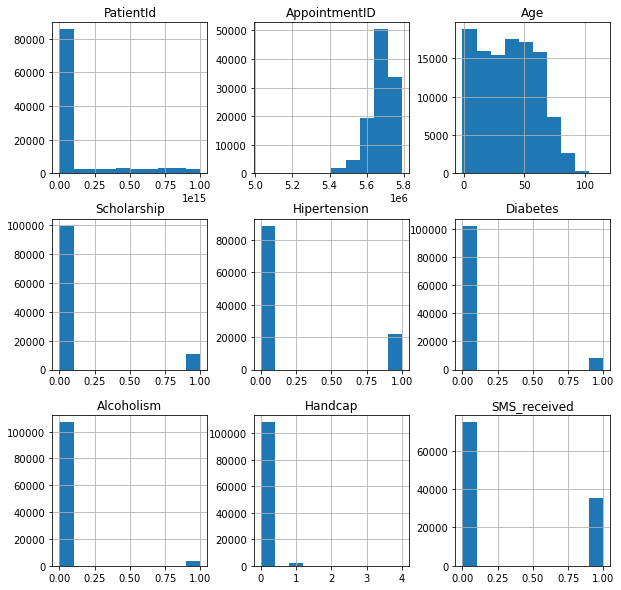

In [7]:
# A look at the dataset distributions
yeshow.hist(figsize = (10,10));


### Data Cleaning (Dropping Rows and Columns, Spelling Corrections, Time Conversions and the 'No-Show' Column)

__Dropped Columns:__
> - __Patient ID:__ this is already another unique method of determining patients and as such two are not necessary
> - __Alcoholism:__ this is not considered relevant, as whether alcoholic or not a patient is still susceptible to chronic diseases (hypertension and diabetes)
> - __Handcap:__ same as with Alcoholism. And in agreement with my opinion on it, an overwhelming number of patients aren't even alcoholic or diabetic

__Dropped Row:__
> - The row with the negative age will be dropped. It will not greatly affect the dataset

__Renamed Columns and Entries:__
> - The _`No_show`_ column will need its name and entries changed to avoid confusing me as I work. I have decided to call it `ShowedUp` and its entries will have to reflect that

__Time Conversions:__
> - In case I will have to reference them, it is best I have 'ScheduledDay' and 'AppointmentDay' in a better format I can compute easily with


In [8]:
# Dropping columns
yeshow.drop(['PatientId', 'Alcoholism', 'Handcap'], axis = 1, inplace = True)


In [9]:
# Checking to see if they have been dropped
yeshow.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,No


In [10]:
# Dropping row, since I know there is a negative number in 'Age', I will start from there
yeshow.query('Age < 0')

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,SMS_received,No-show
99832,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,No


In [11]:
# Dropping the offending row and checking that it has been dropped
yeshow.drop([99832], axis = 0, inplace = True)

In [12]:
# Checking for effected changes
yeshow.query('Age < 0')

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,SMS_received,No-show


In [13]:
# Renaming Columns
yeshow.rename(columns={'No-show': 'ShowedUp', 'Hipertension': 'Hypertension'}, inplace=True)
yeshow.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,SMS_received,ShowedUp
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,No


In [14]:
# Renaming the enries of ShowedUp to make it easier for me to understand
yeshow['ShowedUp'] = yeshow['ShowedUp'].replace({"Yes" : "No", "No" : "Yes"})

In [15]:
yeshow.head(8)

# The Column name now matches withthe contents

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,SMS_received,ShowedUp
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,Yes
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,Yes
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,Yes
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,Yes
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,Yes
5,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,Yes
6,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,No
7,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,No


The change of Yes to No and No to Yes works better for me. I will do the same for all entries with 0s and 1s.

In [16]:
# Converting the 0 and 1 to No and Yes
yeshow['Scholarship'] = yeshow['Scholarship'].map({1 : "Yes", 0 : "No"})
yeshow['Hypertension'] = yeshow['Hypertension'].map({1 : "Yes", 0 : "No"})
yeshow['Diabetes'] = yeshow['Diabetes'].map({1 : "Yes", 0 : "No"})
yeshow['SMS_received'] = yeshow['SMS_received'].map({1 : "Yes", 0 : "No"})


In [17]:
# Checking if changes have been effected
yeshow.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,SMS_received,ShowedUp
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,Yes
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,Yes
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,Yes
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,Yes
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,Yes


In [18]:
# A conversion to a Pandas friendly time format
from datetime import date
from datetime import datetime

In [19]:
yeshow['ScheduledDay'] = pd.to_datetime(yeshow['ScheduledDay'])
yeshow['AppointmentDay'] = pd.to_datetime(yeshow['AppointmentDay'])
yeshow.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,SMS_received,ShowedUp
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,Yes
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,Yes
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,Yes
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,Yes
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,Yes


In [20]:
durat_ion = yeshow['ScheduledDay'].max() - yeshow['ScheduledDay'].min()
durat_ion

Timedelta('211 days 12:53:27')

<a id='eda'></a>
## Exploratory Data Analysis

***

### Does gender affect the show up of a patient? Which gender is more likely to show up?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


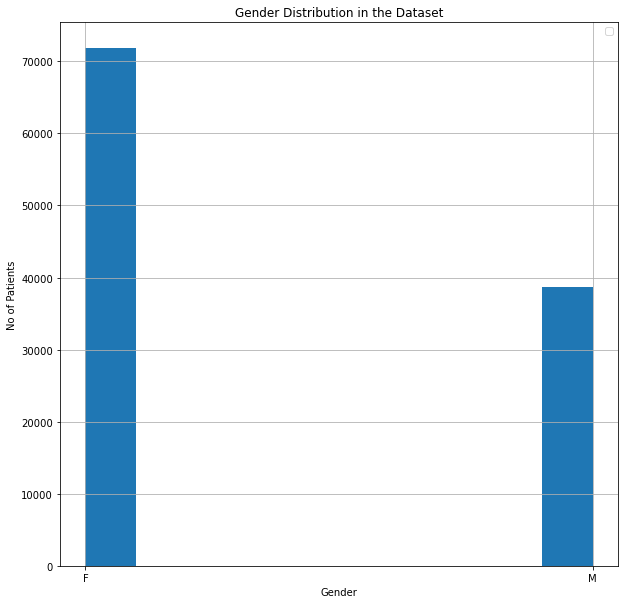

In [21]:
# A look at the gender distribution
yeshow['Gender'].hist(figsize = (10, 10));
plt.xlabel('Gender')
plt.ylabel('No of Patients');
plt.title('Gender Distribution in the Dataset');
plt.legend();

In [22]:
# Let's find out how many of each gender there are
yeshow['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

__There are more women than men, as seen above. But what percentage of each gender forms the total number of patients?__

In [23]:
# A function I created to find out the percentage of each gender that visits the hospital

def perc_gend(Gender):
    
    if Gender == "F":
        return print((71840/yeshow['Gender'].count())*100, 'percent of total patients are female.')
    else:
        if Gender == "M":
            return print((38687/yeshow['Gender'].count())*100, 'percent of total patients are male.')

In [24]:
perc_gend("F")

64.99828094746938 percent of total patients are female.


In [25]:
perc_gend("M")

35.00262381702043 percent of total patients are male.


__There is a higher percentage of females (approx. 65%) than males (approx. 35%) who visit the hospital. Let us have a breakdown of the actual numbers in the next code cell.__

In [26]:
# A breakdown of the genders and the way they visit the hospital
yeshow.groupby('Gender')['ShowedUp'].value_counts()

Gender  ShowedUp
F       Yes         57245
        No          14594
M       Yes         30962
        No           7725
Name: ShowedUp, dtype: int64

__The gender who showed up more to appointments are FEMALE.__
__Overall for both genders, more patients showed up than those who did not.__

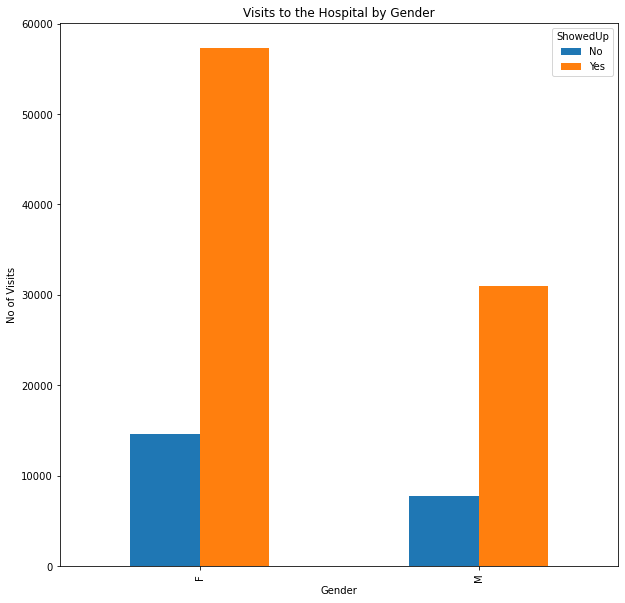

In [27]:
# A graphical representation of the information above
nhood_shows = yeshow.groupby('Gender')['ShowedUp'].value_counts()

nhood= nhood_shows.unstack()
nhood.plot(kind='bar', figsize = (10,10));

plt.title('Visits to the Hospital by Gender');
plt.xlabel('Gender');
plt.ylabel('No of Visits');

In [28]:
# The actual percentage of each gender who showed up
def perc_gend_show(Gender):
    
    if Gender == "F":
        return print((57246/yeshow['Gender'].count())*100, 'percent of patients who showed up are female.')
    else:
        if Gender == "M":
            return print((30962/yeshow['Gender'].count())*100, 'percent of patients who showed up are male.')

In [29]:
perc_gend_show("F")

51.79414798327995 percent of patients who showed up are female.


In [30]:
perc_gend_show("M")

28.013318133289903 percent of patients who showed up are male.


__The larger percentage of patients who show up are still female.__

### Which neigbourhood received the highest patient turnout for appointments? What number of hypertensive patients did they receive? 

In [31]:
# Which neigbourhood has received the most visits frp, patients?
yeshow['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

__The highest number of visits took place in hospitals in Jardim Camburi__

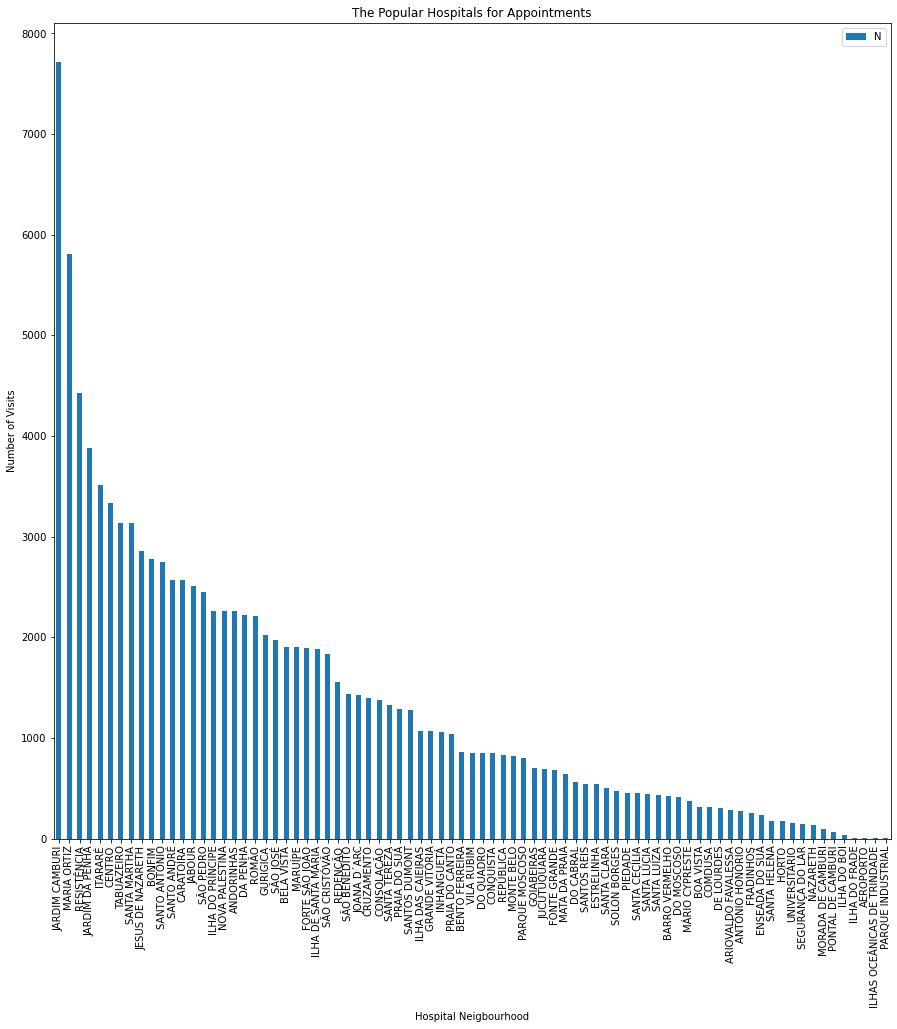

In [32]:
# Let us see this visually
busy_hood = yeshow['Neighbourhood'].value_counts()

busy_hood.plot(kind='bar', figsize = (15, 15));
plt.title ('The Popular Hospitals for Appointments');
plt.xlabel('Hospital Neigbourhood');
plt.ylabel('Number of Visits');
plt.legend('No of Visits');

In [33]:
# Let us see the hypertensive counts across the various hospitals
hyps = yeshow.groupby('Neighbourhood')['Hypertension'].value_counts()
hyps

Neighbourhood    Hypertension
AEROPORTO        No                 6
                 Yes                2
ANDORINHAS       No              1676
                 Yes              586
ANTÔNIO HONÓRIO  No               266
                                 ... 
TABUAZEIRO       Yes              712
UNIVERSITÁRIO    No               111
                 Yes               41
VILA RUBIM       No               618
                 Yes              233
Name: Hypertension, Length: 159, dtype: int64

In [34]:
# The specific hypertensive count for the most visited neighbourhodd hospital
hyps.loc["JARDIM CAMBURI"]

Hypertension
No     7208
Yes     509
Name: Hypertension, dtype: int64

__The most visited hospital had 509 hypertensive patients.__

In [35]:
yeshow.groupby('Neighbourhood')['Age'].mean().loc["JARDIM CAMBURI"]

43.73150187896851

### Does being an SMS recipient increase turn out of scheduled appointments? in chronic patients? In older patients? On the appointment day? Does it make a difference?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


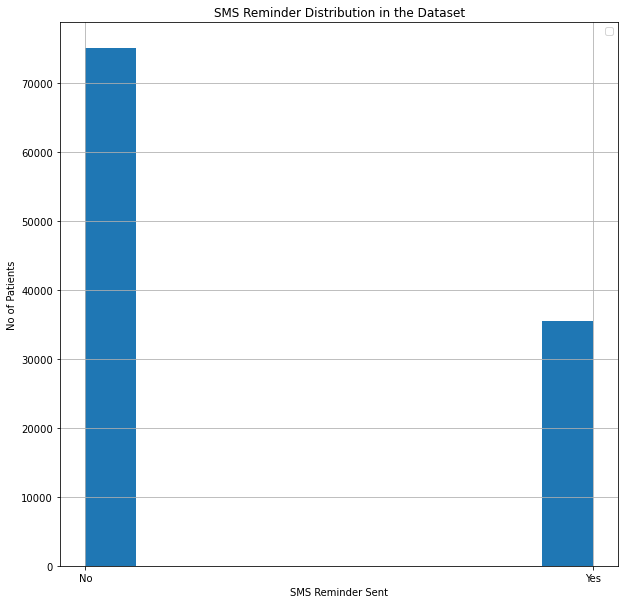

In [36]:
# A quick visual on the SMS reminder distribution
plt.figure(figsize = (10, 10))
yeshow['SMS_received'].hist()
plt.xlabel('SMS Reminder Sent')
plt.ylabel('No of Patients')
plt.title('SMS Reminder Distribution in the Dataset')
plt.legend();

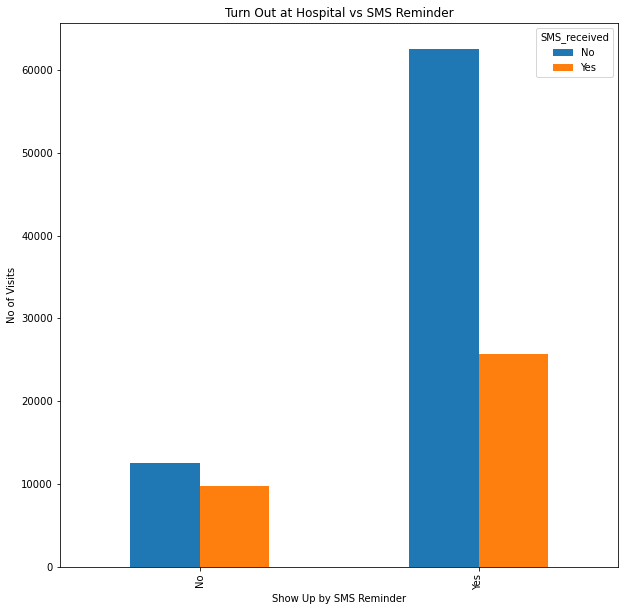

In [37]:
# To visualize how many people who showed up had received an invite
cods = yeshow.groupby('ShowedUp')['SMS_received'].value_counts()

cod= cods.unstack()
cod.plot(kind='bar', figsize = (10,10))
plt.title('Turn Out at Hospital vs SMS Reminder')
plt.xlabel('Show Up by SMS Reminder')
plt.ylabel('No of Visits');

__Patients who did not even receive the SMS reminder turned up for the appointment more than patients who did. We can look at their exact numbers below.__

In [38]:
# The exact numbers of people who received an SMS reminder as in the above plot
yeshow.groupby('ShowedUp')['SMS_received'].value_counts()

ShowedUp  SMS_received
No        No              12535
          Yes              9784
Yes       No              62509
          Yes             25698
Name: SMS_received, dtype: int64

In [39]:
# Likelihood of Showing Up when Receiving a message
def likely_show(SMS_received):
    
    if SMS_received == "Yes":
        return print((25698/(25698 + 62510))*100, 'percent of patients showed up after receiving an SMS reminder.')
    else:
        if SMS_received == "No":
            return print((62510/(25698 + 62510))*100, 'percent of patients showed up without receiving an SMS reminder.')

In [40]:
likely_show("Yes")

29.133411935425357 percent of patients showed up after receiving an SMS reminder.


In [41]:
likely_show("No")

70.86658806457464 percent of patients showed up without receiving an SMS reminder.


__The percentage of people who showed up without receiving an SMS reminder is more than double the number of those who received an SMS reminder and did not show up.__

<a id='conclusions'></a>
## Conclusions




#### Does gender affect the show up of a patient? Which gender is more likely to show up?

> There are more females than males in the dataset, approximately 65% of the dataset were female, so there will be more females showing up to appointments overall.

> The gender with the largest percentage of patients who showed up were still females at 51.79% of the patients who showed up.

#### Which neigbourhood received the highest patient turnout for appointments? What number of hypertensive patients did they receive?

> The highest number of visits took place in hospitals in JARDIM CAMBURI with 7717 visits in the period of 211 days. They had 509 hypertensive patients.

#### Does being an SMS recipient increase turn out of scheduled appointments? 

> No, from the EDA findings, it does not make much of a difference. Most of the patients who received a reminder SMS did not turn up, while those who did not receive a reminder were  approximately twice as likely to show up.
>
> Approximately _29.14% of patients __showed up after__ receiving an SMS reminder._
>
> Approximately _70.86%_ of patients __showed up without__ receiving an SMS reminder._

Disclaimer: Proper statistical analysis has not been carried out on the data to give very accurate results. This is a broad anlysis without deep relations.

References: https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas